## DATA SCIENCE PROJECT - 4 : EMAIL SPAM DETECTION
The following machine learning model is used to determine wheter a message is spam or not. The model is tested for accuracy as well.The modelling takes place as following

In [40]:
#importing libraries/packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import warnings
warnings.filterwarnings("ignore")

## Data Extraction And Exploration

In [41]:
#Reading the csv file : 
d=pd.read_csv("spam.csv")

In [42]:
d.shape

(5572, 5)

In [43]:
col=d.columns
print("The colums are : ")
for i in col:
    print(i)

The colums are : 
v1
v2
Unnamed: 2
Unnamed: 3
Unnamed: 4


In [44]:
#Since columns 2,3,4 are unnamed; we rename those columns : 
d.columns=['label','message','u1','u2','u3']

In [45]:
d.columns

Index(['label', 'message', 'u1', 'u2', 'u3'], dtype='object')

In [46]:
d.dtypes

label      object
message    object
u1         object
u2         object
u3         object
dtype: object

In [47]:
d.describe()

,label,message,u1,u2,u3
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [48]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   u1       50 non-null     object
 3   u2       12 non-null     object
 4   u3       6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [49]:
d.head()

,label,message,u1,u2,u3
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [50]:
d.tail()

,label,message,u1,u2,u3
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


## UNIVARIATE ANALYSIS

In [51]:
d['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

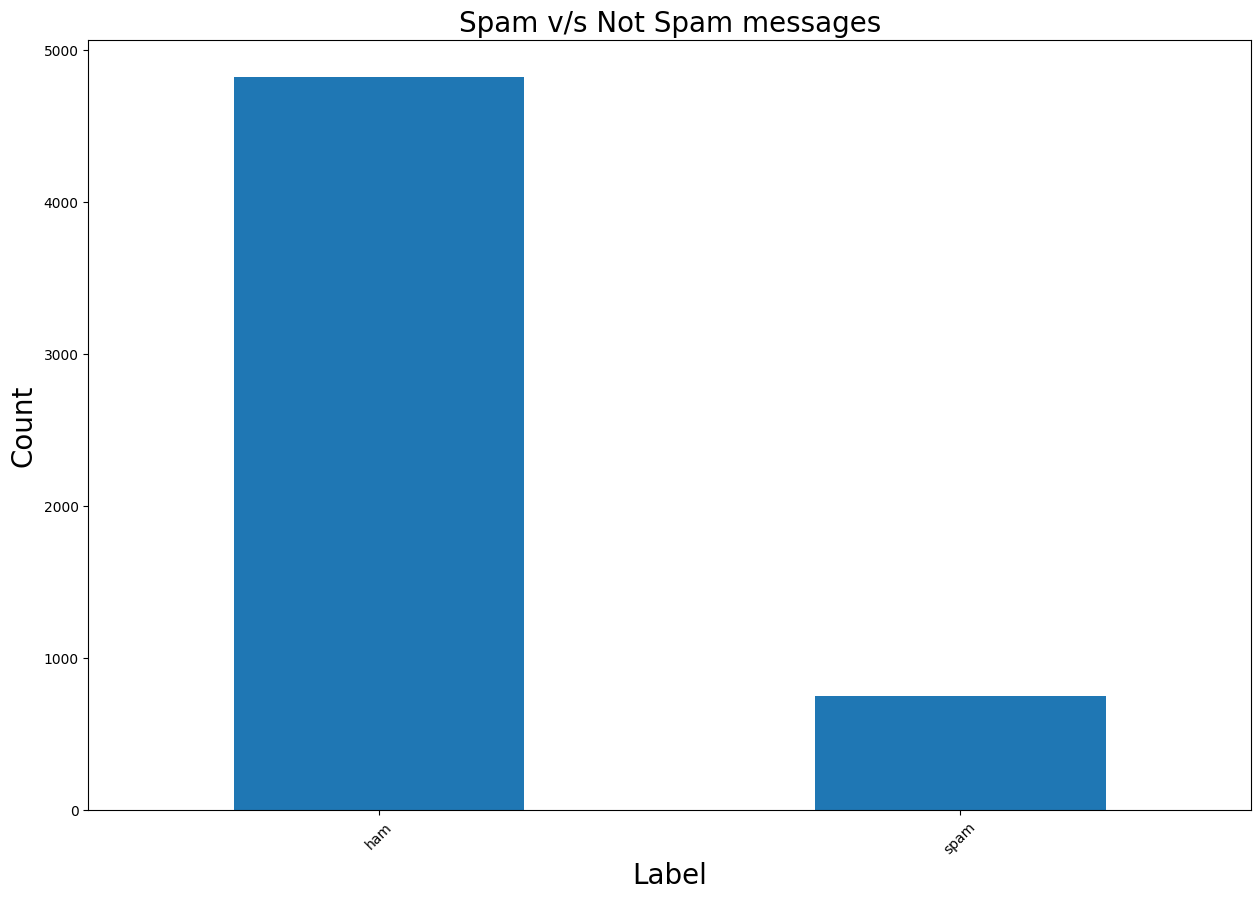

In [52]:
plt.figure(figsize=(15,10))
d['label'].value_counts().plot.bar()
plt.title("Spam v/s Not Spam messages",fontsize=20)
plt.xlabel("Label",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.xticks(rotation=45)
plt.show

Clearly, non-spam messages are more than spam messages in our dataset.

## MISSING VALUE DETECTION AND TREATMENT

In [53]:
d.isnull().sum()

label         0
message       0
u1         5522
u2         5560
u3         5566
dtype: int64

In [54]:
#Empty values detected, treated as follows:
d['u1'].fillna('',inplace=True)
d['u2'].fillna('',inplace=True)
d['u3'].fillna('',inplace=True)
d.head()

,label,message,u1,u2,u3
0,ham,"Go until jurong point, crazy.. Available only ...",,,
1,ham,Ok lar... Joking wif u oni...,,,
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,,,
3,ham,U dun say so early hor... U c already then say...,,,
4,ham,"Nah I don't think he goes to usf, he lives aro...",,,


In [55]:
#Combining the message and additional columns into sigle message column : 
d['msg']=d['message']+' '+d['u1']+' '+d['u2']+' '+d['u3']
print(d.head())

  label                                            message u1 u2 u3  \
0   ham  Go until jurong point, crazy.. Available only ...            
1   ham                      Ok lar... Joking wif u oni...            
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...            
3   ham  U dun say so early hor... U c already then say...            
4   ham  Nah I don't think he goes to usf, he lives aro...            

                                                 msg  
0  Go until jurong point, crazy.. Available only ...  
1                   Ok lar... Joking wif u oni...     
2  Free entry in 2 a wkly comp to win FA Cup fina...  
3  U dun say so early hor... U c already then say...  
4  Nah I don't think he goes to usf, he lives aro...  


In [56]:
# Preprocessing the text
def prep_text(text):
    text=text.lower()
    text=text.translate(str.maketrans('','',string.punctuation))
    words=text.split()
    stop_words=set(stopwords.words('english'))
    stemmer=PorterStemmer()
    words=[stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)

#Apply to combined messages:
d['msg']=d['msg'].apply(prep_text)
print(d.head())


  label                                            message u1 u2 u3  \
0   ham  Go until jurong point, crazy.. Available only ...            
1   ham                      Ok lar... Joking wif u oni...            
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...            
3   ham  U dun say so early hor... U c already then say...            
4   ham  Nah I don't think he goes to usf, he lives aro...            

                                                 msg  
0  go jurong point crazi avail bugi n great world...  
1                              ok lar joke wif u oni  
2  free entri 2 wkli comp win fa cup final tkt 21...  
3                u dun say earli hor u c alreadi say  
4          nah dont think goe usf live around though  


In [57]:
#Converting labels to binary values, dropping Nan valued rows
d['label']=d['label'].map({'spam':1,'ham':0})
d.dropna(subset=['label','msg'], inplace=True)
d.head()

,label,message,u1,u2,u3,msg
0,0,"Go until jurong point, crazy.. Available only ...",,,,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,,,,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,,,,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,,,,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",,,,nah dont think goe usf live around though


## OUTLIER DETECTION AND TREATMENT

In [58]:
#Calculate messages' lengths
d['msg_len']=d['msg'].apply(len)
d.head()

,label,message,u1,u2,u3,msg,msg_len
0,0,"Go until jurong point, crazy.. Available only ...",,,,go jurong point crazi avail bugi n great world...,76
1,0,Ok lar... Joking wif u oni...,,,,ok lar joke wif u oni,21
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,,,,free entri 2 wkli comp win fa cup final tkt 21...,131
3,0,U dun say so early hor... U c already then say...,,,,u dun say earli hor u c alreadi say,35
4,0,"Nah I don't think he goes to usf, he lives aro...",,,,nah dont think goe usf live around though,41


In [59]:
#Detecting Outliers using interquartile range IQR:
Q1=d['msg_len'].quantile(0.25)
Q3=d['msg_len'].quantile(0.75)
IQR=Q3-Q1
print("Q1 =",Q1)
print("Q3 =",Q3)
print("IQR =",IQR)

Q1 = 21.0
Q3 = 74.0
IQR = 53.0


In [60]:
#Defining Outlier bounds
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR

In [61]:
#Identifying outliers and treating :
out=d[(d['msg_len']<lower) | (d['msg_len']>upper) ]
print(out[['msg','msg_len']].head(),"\n\n\n")
data=d[~((d['msg_len']<lower)|(d['msg_len']>upper))]
print(data[['msg','msg_len']].head())

                                                   msg  msg_len
154  everywher dirt floor window even shirt sometim...      195
380  guess that worri must know there way bodi repa...      164
424  send ur friend receiv someth ur voic speak exp...      158
472  noth meant money enter account bank remov flat...      178
710  height confid aeronaut professor wer calld amp...      194 



                                                 msg  msg_len
0  go jurong point crazi avail bugi n great world...       76
1                              ok lar joke wif u oni       21
2  free entri 2 wkli comp win fa cup final tkt 21...      131
3                u dun say earli hor u c alreadi say       35
4          nah dont think goe usf live around though       41


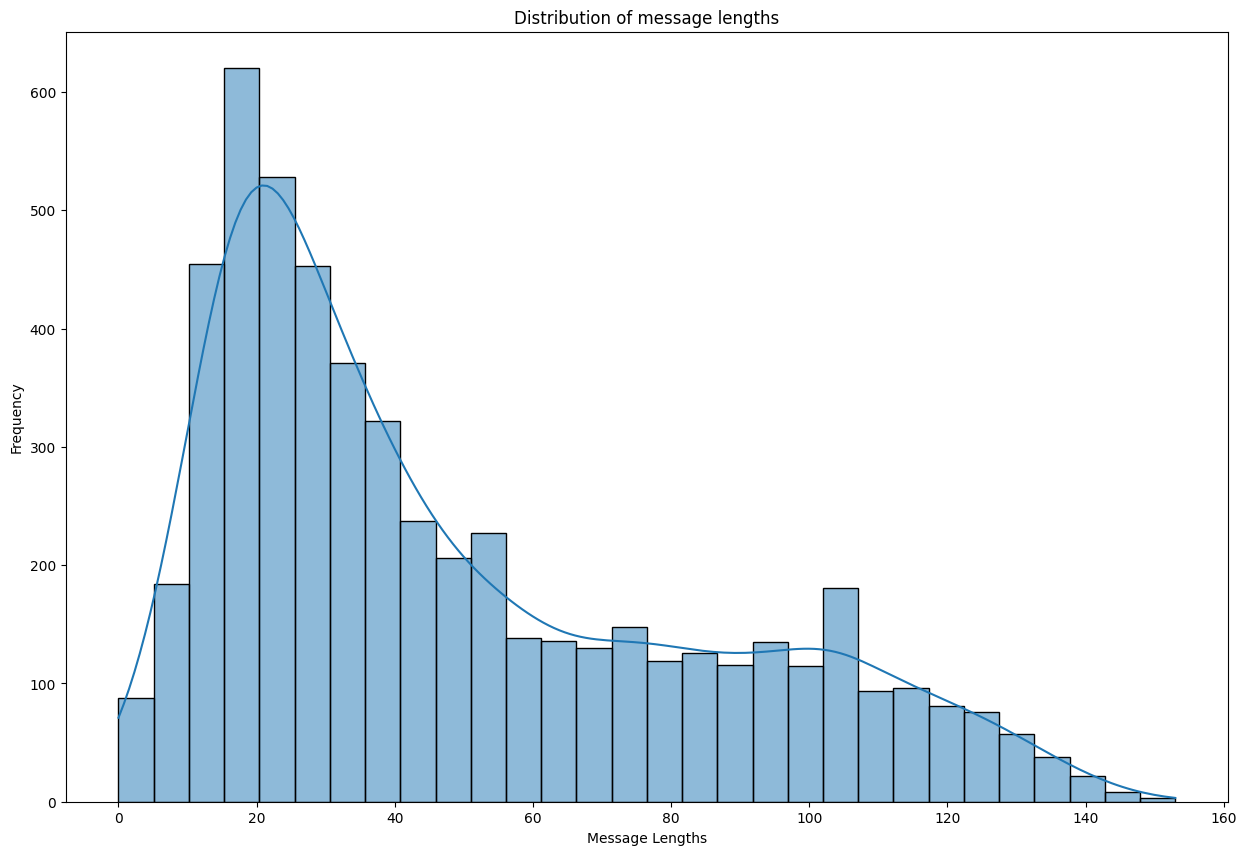

In [62]:
#Distribution of message lengths using histplot
plt.figure(figsize=(15,10))
sn.histplot(data['msg_len'], bins=30, kde=True)
plt.title("Distribution of message lengths")
plt.xlabel("Message Lengths")
plt.ylabel("Frequency")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

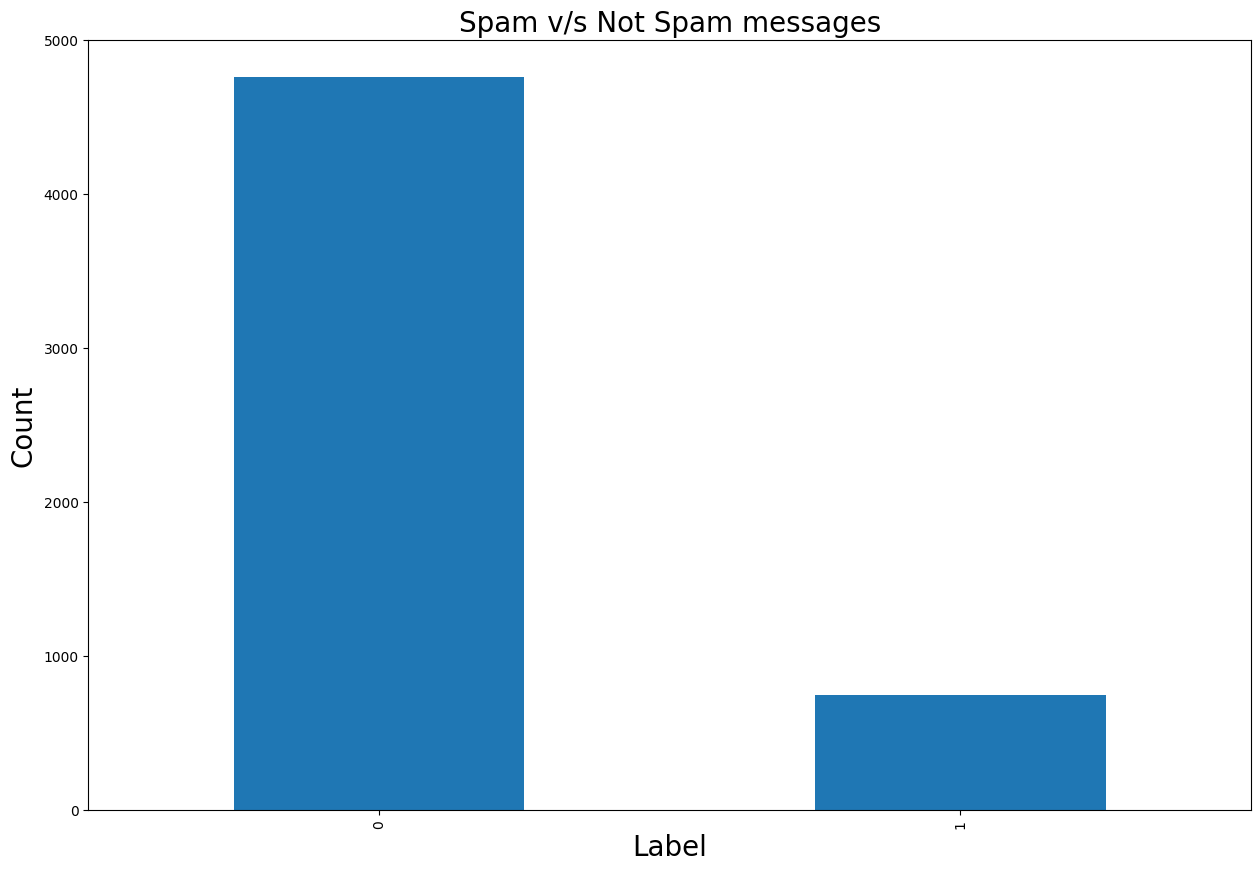

In [63]:
plt.figure(figsize=(15,10))
data['label'].value_counts().plot.bar()
plt.title("Spam v/s Not Spam messages",fontsize=20)
plt.xlabel("Label",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.show

0 - No Spam , 1 - Spam

## MODEL BUILDING

1. The following model is of type *LOGISTIC REGRESSION*

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

In [65]:
# Coverting text to suitable format so that splitting of dataset into train and test datasets is easy 
v=TfidfVectorizer()
X=v.fit_transform(data['msg'])
y=data['label']

In [66]:
X_train, X_test, y_train,  y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [67]:
lreg=LogisticRegression()
lreg.fit(X_train,y_train)

LogisticRegression()

In [68]:
#Predictions made
y_pred=lreg.predict(X_test)

In [69]:
#Evaluating the model
accuracy=accuracy_score(y_test, y_pred)

In [70]:
print("The accuracy of the model is :",accuracy*100,"%")

The accuracy of the model is : 96.27949183303085 %


2. The following model is *DECISION TREE CLASSIFIER*

In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
dtr=DecisionTreeClassifier()

In [73]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [74]:
dtr.fit(X_train,y_train)

DecisionTreeClassifier()

In [75]:
y_pred=dtr.predict(X_test)

In [76]:
accuracy=accuracy_score(y_test, y_pred)

In [77]:
print("The accuracy using decision tree classifier :",accuracy*100,"%")

The accuracy using decision tree classifier : 97.1869328493648 %


In conclusion, Decision tree classifier turns out to be more accurate then logistic regression model in making predictions.